# Paradigmas de Aprendizagem de Máquina 2024.2 - Prova 2
Aluno: Giordano Bruno de Arruda Rodrigues  
Mat. : 20190019019

# 0. Preparação do Ambiente


    0.1.   Permissão para acessar os arquivos do drive;  
    0.2.   Dependências.

In [1]:
# 0.1. Permissão para acessar arquivos do Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 0.2. Dependências

# Análise e manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Redução de dimensionalidade
from sklearn.decomposition import PCA

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering

# Avaliação de modelos
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, silhouette_score
)

#  1. Pré-processamento da base de dados
### Seção referente à questão 1 item (a):
> Efetue o pré-processamento da base de dados, considerando:
* Tratamento de valores ausentes (se houver);
* Redução de dimensionalidade via seleção de atributos ou técnicas como PCA;
* Avalie o impacto da redução de dimensionalidade nos modelos.



## 1.1. Carregamento e visualização de informações básicas do dataframe;

In [3]:
# Carregamento do dataframe:
df = pd.read_csv('drive/MyDrive/colab_notebooks/paradigmas_de_aprendizagem_de_maquina/radiomic_data_binary.csv')

# Visualização da quantidade de linhas e colunas do dataframe (linhas, colunas)
df.shape

(2018, 116)

In [4]:
# visualização das primeiras 5 linhas
df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},245a9a4dd4a20aabe9c478e95a35aa833ca20590,2D,"(1.0, 1.0)",...,0.000038,8.692009,0.962976,0.040777,0.028123,0.000123,8.843847e+06,5.416673,42.367873,BENIGN
1,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b3a0776528a8f7438a2f6cc95486cafad01adefa,2D,"(1.0, 1.0)",...,0.000021,10.126931,0.963992,0.039417,0.002454,0.000299,4.859019e+07,14.347313,540.091956,BENIGN
2,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f204a9caa1dea0bd0cfa97a68b8b1b98e9c45054,2D,"(1.0, 1.0)",...,0.000023,9.818248,0.882666,0.167003,0.001089,0.000951,3.526641e+06,0.706177,687.525538,BENIGN
3,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8e7a5be028d372a7e1729e2bd28bac01c4a00a8b,2D,"(1.0, 1.0)",...,0.000021,9.865219,0.934424,0.078779,0.001812,0.000794,5.654092e+06,1.171521,381.671430,BENIGN
4,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1e4e7e585f4bfb62c816c1b42c5215a913246ea6,2D,"(1.0, 1.0)",...,0.000013,9.779599,0.926990,0.088650,0.003791,0.000372,5.173518e+06,1.087884,213.296874,BENIGN


## 1.2. Análise inicial dos dados do dataframe

### 1.2.1. Buscando valores nulos ou duplicados no dataframe

In [5]:
# busca por valores nulos no dataframe
if not df.isnull().values.any():
  print('Não há nenhum valor nulo no dataframe.')
  print('df.isnull().values.any() =', df.isnull().values.any())
else:
  print('Valores nulos:')
  print(df.isnull().sum())

Não há nenhum valor nulo no dataframe.
df.isnull().values.any() = False


In [6]:
# busca por valores duplicados no dataframe
if not df.duplicated().any():
  print('Não há nenhuma linha duplicada no dataframe.')
  print('df.duplicated().any() =', df.duplicated().any())
else:
  print('Linhas duplicadas:')
  print(df.duplicated().sum())

Não há nenhuma linha duplicada no dataframe.
df.duplicated().any() = False


### 1.2.2. Análise das colunas do dataframe
Como pudemos notar nas seções anteriores, não há valores nulos ou duplicados para serem tratados no dataframe. Dessa maneira, vamos verificar os nomes de todas as colunas e buscar entender os seus significados.

In [7]:
# exibindo os nomes de todas as colunas, e contando uma a uma para fins de validação
count_columns = 0
print('Colunas:')
for col in df.columns:
  count_columns += 1
  print(f'\t{col}')
print('Quantidade de colunas:', count_columns)

Colunas:
	diagnostics_Versions_PyRadiomics
	diagnostics_Versions_Numpy
	diagnostics_Versions_SimpleITK
	diagnostics_Versions_PyWavelet
	diagnostics_Versions_Python
	diagnostics_Configuration_Settings
	diagnostics_Configuration_EnabledImageTypes
	diagnostics_Image-original_Hash
	diagnostics_Image-original_Dimensionality
	diagnostics_Image-original_Spacing
	diagnostics_Image-original_Size
	diagnostics_Image-original_Mean
	diagnostics_Image-original_Minimum
	diagnostics_Image-original_Maximum
	diagnostics_Mask-original_Hash
	diagnostics_Mask-original_Spacing
	diagnostics_Mask-original_Size
	diagnostics_Mask-original_BoundingBox
	diagnostics_Mask-original_VoxelNum
	diagnostics_Mask-original_VolumeNum
	diagnostics_Mask-original_CenterOfMassIndex
	diagnostics_Mask-original_CenterOfMass
	original_firstorder_10Percentile
	original_firstorder_90Percentile
	original_firstorder_Energy
	original_firstorder_Entropy
	original_firstorder_InterquartileRange
	original_firstorder_Kurtosis
	original_firs

Analisando os nomes das colunas, podemos perceber que elas podem ser separadas em três tipos:

1.  Colunas do tipo 'diagnostics';
2.  Colunas do tipo 'original';
3.  Uma coluna do tipo 'class'.

Assim, vamos contar quantas colunas temos de cada tipo no dataframe:

In [8]:
# contagem de colunas por tipo:
diagnostics_columns_count = 0
original_columns_count = 0
class_column_count = 0

for col in df.columns:
    if col.startswith('diagnostics_'):
        diagnostics_columns_count += 1
    elif col.startswith('original_'):
        original_columns_count += 1
    elif col == 'class':
      class_column_count += 1

print(f"Colunas do tipo 'diagnostics': {diagnostics_columns_count}")
print(f"Colunas do tipo 'original'   : {original_columns_count}")
print(f"Colunas do tipo 'class'      : {class_column_count}")

# soma de todos os tipos de colunas + a coluna 'class' que só tem 1
print(f"Total ('diagnostics' + 'original' + 'class'): {diagnostics_columns_count + original_columns_count + class_column_count}")

Colunas do tipo 'diagnostics': 22
Colunas do tipo 'original'   : 93
Colunas do tipo 'class'      : 1
Total ('diagnostics' + 'original' + 'class'): 116


Da análise dessas colunas, pode-se perceber que:
* As colunas iniciadas com o prefixo 'diagnostics_' fornecem metadados sobre o processo de extração de características (versões de software, configurações, informações de imagem e máscara);

* As colunas iniciadas com o prefixo 'original_' representam um conjunto de características extraídas diretamente do conteúdo das imagens e são potencialmente importantes para as analises que devemos fazer;

* A coluna de nome 'class' informa a classe (rótulo) de cada amostra de imagem no dataframe. Essa coluna é muito importante para as análises que devemos fazer.

## 1.3. Redução de dimensionalidade

### 1.3.1. Remoção de colunas com informações que não são importantes para nossas análises.

* Pudemos perceber que as colunas do tipo 'diagnostics' não contém informações relevantes para nossas análises. Dessa maneira, utilizaremos o método de seleção de atributos para remover essas colunas e diminuir a dimensionalidade do dataframe, mantendo, assim, apenas dados diretamente relacionados ao conteúdo das imagens.

In [9]:
# redução de dimensionalidade utilizando seleção de atributos
cols_to_drop = [col for col in df.columns if col.startswith('diagnostics_')]
df.drop(columns=cols_to_drop, inplace=True)
print('Colunas removidas:', len(cols_to_drop))
print('Colunas restantes:', df.shape[1])

Colunas removidas: 22
Colunas restantes: 94


### 1.3.2. Redução de dimensionalidade utilizando a técnica de análise de Correlação de Pearson

* Pode-se perceber que, mesmo após a redução de dimensionalidade por seleção de atributos, o nosso dataframe ainda permance com uma dimensionalidade muito alta: 94 colunas, dessa maneira, buscando reduzir ainda mais, buscamos aplicar a técnica de análise de correlação de Perason;

* Redução de dimensionalidade via correlação de Pearson tem como objetivo eliminar variáveis que são altamente correlacionadas entre si, pois essas variáveis tendem a carregar informações redundantes, bastando, assim, que apenas uma das variáveis seja mantida;

In [10]:
# verificando a coluna alvo (rótulo)
df['class'].value_counts()

,count
class,
BENIGN,1100
MALIGNANT,918


Podemos notar que a coluna alvo tem dois valores apenas:
1.   BENIGN (com 1100 ocorrências);
2.   MALIGNANT (com 918 ocorrências).  

* Esses valores são bem proporcionais, assim não há necessidade de aplicação de nenhuma técnica que visa tratar dados desbalanceados.

* A matriz de correlação será calculada apenas entre as variáveis independentes (features radiômicas). A coluna "class" é o rótulo (BENIGN ou MALIGNANT), e não faz sentido incluí-la nesse cálculo, pois queremos entender a relação entre as features, e não com o rótulo.

In [11]:
# Separar os dados e a variável alvo (rótulo)
dados_corr = df.drop(columns=["class"])
rotulo_corr = df["class"]

# Calcular a matriz de correlação de pearson
# usa o valor absoluto .abs() pois pega correlações positivas e negativas
correlation_matrix = dados_corr.corr(method="pearson").abs()

# verificando quantas colunas de dados ficamos após a remoção da coluna com a variável alvo
# O esperado é 93 pois temos em nosso dataframe 94 colunas
dados_corr.shape

(2018, 93)

A matriz de correlação é simétrica. Ou seja, corr(x, y) = corr(y, x) e corr(x, x) = 1.

Assim, a metade da matriz é repetida. O triângulo superior da matriz é a parte acima da diagonal principal, selecionar apenas ele faz com que não se verifique as mesmas correlações duas vezes.

In [12]:
# Selecionar apenas a parte superior da matriz de correlação (triângulo superior)
# cria-se uma matriz de booleanos, tipo uma máscara, em que o triângulo superior é todo preenchido com True
# e a diagonal principal e o triângulo inferior com False;
# Depois utiliza essa máscara para selecionar apenas o triângulo superior
triangulo_superior = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
triangulo_superior.shape

(93, 93)

Identifica-se as colunas com alta correlação.

* Buscaremos colunas que contém uma correlação maior que 90% para remover, pois essa é uma alta correlação e, portanto, um bom valor para se aplicar, sem muito risco de perda de informações únicas e muito importantes;



In [13]:
# Encontrar colunas com correlação maior que 0.90
limite_correlacao = 0.90
to_drop = [column for column in triangulo_superior.columns if any(triangulo_superior[column] > limite_correlacao)]

# Remover essas colunas
dados_corr_filtered = dados_corr.drop(columns=to_drop)

print(f"{len(to_drop)} colunas para remover por alta correlação.")

67 colunas para remover por alta correlação.


Criando um novo dataframe sem as colunas correlacionadas

In [14]:
df_corr_filtered = pd.concat([dados_corr_filtered, rotulo_corr], axis=1)

# espera-se 2018 linhas e 41 colunas
# 41 = 94 colunas atualmente em df - 53 colunas para remover por correlação
df_corr_filtered.shape

(2018, 27)

### 1.3.3. Redução de dimensionalidade por PCA
* Após a redução por correlação, obtivemos um dataframe com 27 colunas (dimensões), esse valor ainda é potencialmente alto, dessa maneira buscamos aplicar o PCA para tentar reduzir ainda mais;

* Com o PCA buscamos reduzir dimensionalidade transformando as features originais em um novo conjunto de componentes não correlacionados que capturam a maior variância possível dos dados.

In [15]:
# Separar novamente os dados da variável alvo (rótulo)
dados_pca = df_corr_filtered.drop(columns=["class"])
rotulo_pca = df_corr_filtered["class"]

O PCA é sensível à escala das variáveis. Se um atributo tiver valores grandes e outro valores muito pequenos a variância do primeiro dominará a análise.

Utilizaremos a função standardScaler() para normalizar, ela transforma os dados para que cada feature tenha média 0 e desvio padrão 1, o que garante que todas as variáveis tenham o mesmo peso na hora de calcular os componentes principais.

In [16]:
# normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_pca)

Aqui, iremos escolher preservar 95% da variância total dos dados originais, assim queremos manter a quantidade mínima de componentes nescessários para poder preservar essa variância;

E com o método fit_transform, calcularemos os componentes principais com base na variância dos dados, isso projeta os dados originais no novo sistema de coordenadas reduzido

In [17]:
# aplicando o PCA mantendo 95% da variância
pca = PCA(n_components=0.95)
dados_pca_transformado = pca.fit_transform(dados_normalizados)

# vendo quantos componentes foram mantidos
print(f"{pca.n_components_} componentes mantidos.")


12 componentes mantidos.


## 1.4. Conclusão da redução de dimensionaidade
Com um dataframe inicial contendo 116 dimensões, obtivemos os seguintes resultados ao reduzir as dimensionalidade, de maneira consecutiva, por:
1.   Seleção de atributos: De 116 para 94;
2.   Análise de Correlação de Pearson: De 94 para 27;
3.   PCA: De 27 para 12

Portanto, somando essas três técnicas obtivemos uma redução total de 116 para 12 dimensões. O que equivale a uma redução de quase 90%



# 2. Treino e comparação do desempenho dos algoritmos:

### Seção referente à questão 1 item (b):
> Treine e compare o desempenho dos algoritmos:
* Árvore de Decisão;
* MLP (Perceptron Multicamadas).


## 2.1. Validação cruzada estratificada
Conforme instruções da prova:
> "Utilize validação cruzada estratificada 10-fold e fixe o random_state para garantir reprodutibilidade nos resultados."

In [18]:
# Validação cruzada estratificada:

# com 10 divisões (folds)
folds = 10

#fixando random_state
r_state = 42

# shuffle=True embaralha os dados antes de dividir.
validador = StratifiedKFold(n_splits = folds, shuffle=True, random_state = r_state)

## 2.2 Árvore de decisão e MLP
Instanciando os modelos utilizando o random_state previamente determinado em r_state.

In [19]:
# Instanciando os modelos de árvore de decisão e mlp
modelo_arvore = DecisionTreeClassifier(random_state = r_state)

# max_iter = 1000 fixando um máximo de 1000 iterações do modelo
modelo_mlp = MLPClassifier(random_state = r_state, max_iter=1000)

## 2.3. Avaliação dos modelos
Utilizaremos F1-score, Matriz de confusão e Curva ROC/AUC

### Seção referente à questão 1 item (c):

> Avalie os modelos utilizando F1-score, matriz de confusão e curva ROC/AUC. Compare os resultados obtidos e discuta qual algoritmo apresentou o melhor desempenho e por quê.

### 2.3.1 - Avaliação com F1-Score

In [20]:
# Avaliação com F1-score (macro: trata classes igualmente)
f1_arvore = cross_val_score(modelo_arvore, dados_pca_transformado, rotulo_pca, cv=validador, scoring='f1_macro')
f1_mlp = cross_val_score(modelo_mlp, dados_pca_transformado, rotulo_pca, cv=validador, scoring='f1_macro')


# cross_val_score(): avalia os modelos em 10 rodadas (1 fold é teste, 9 são treino).
# scoring = 'f1_macro': computa o F1 para cada classe e depois tira a média.
# Resultado: F1 médio dos dois modelos.

print("F1 médio - Árvore de Decisão:", f1_arvore.mean())
print("F1 médio - MLP:", f1_mlp.mean())



F1 médio - Árvore de Decisão: 0.547604363752783
F1 médio - MLP: 0.6191500207500695


#### 2.3.1.1. Resultados do F1-Score:
* F1 médio - Árvore de Decisão: Aprox. 0.5476
* F1 médio - MLP: Aprox. 0.6191

Esses valores indicam que o modelo de MLP apresentou um desempenho superior à Árvore de Decisão.

Com um F1 médio de aproximadamente 0.62, o MLP se mostrou razoavelmente eficaz, embora ainda haja espaço para melhorias. Já a Árvore de Decisão, com F1 próximo de 0.55, apresentou um desempenho mais fraco, com menor equilíbrio entre acertos e erros.

### 2.3.2. Prevendo os rótulos para análise detalhada

* rotulos_previstos_arvore: classe prevista para cada exemplo pela árvore.

* rotulos_previstos_mlp: classe prevista para cada exemplo por MLP.

In [21]:
# Previsões usando validação cruzada para cada modelo
rotulos_previstos_arvore = cross_val_predict(modelo_arvore, dados_pca_transformado, rotulo_pca, cv=validador)
rotulos_previstos_mlp = cross_val_predict(modelo_mlp, dados_pca_transformado, rotulo_pca, cv=validador)


### 2.3.3. Matrizes de confusão da Árvore de decisão e do MLP



In [22]:
# fnção para poder plotar a matriz de confusão, tanto para Árvore de decisão quanto para o MLP
def plot_matriz_confusao(y_true, y_pred, modelo_nome):
    matriz = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'MALIGNANT'], yticklabels=['BENIGN', 'MALIGNANT'])
    plt.xlabel('Classe prevista')
    plt.ylabel('Classe verdadeira')
    plt.title(f'Matriz de Confusão - {modelo_nome}')
    plt.show()

#### 2.3.3.1. Resultados: Matriz de confusão para Árvore de decisão

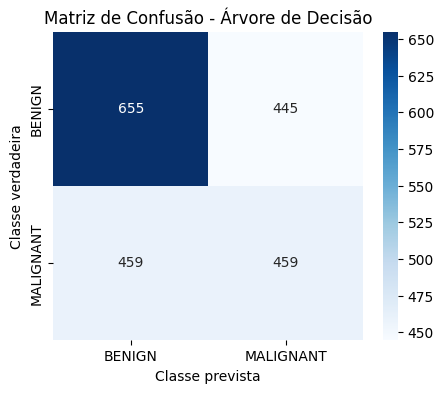

In [23]:
# plotando a matriz de confusão para a Árvore de decisão
plot_matriz_confusao(rotulo_pca, rotulos_previstos_arvore, "Árvore de Decisão")


#### 2.3.3.2. Resultados Matriz de confusão para o MLP

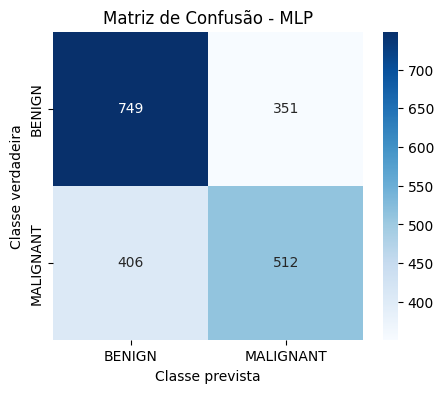

In [24]:
# plotando a matriz de confusão para o MLP
plot_matriz_confusao(rotulo_pca, rotulos_previstos_mlp, "MLP")


#### 2.3.3.3. Avaliação comparativa entre os modelos através da matriz de confusão

* A matriz de confusão mostra que o modelo MLP apresenta melhor capacidade de separação entre as classes. Ele acerta mais nos dois lados: tanto em detectar corretamente os casos benignos quanto os malignos. Apesar de ainda ter erros relevantes (como 406 falsos negativos), o desempenho representa uma melhora significativa em relação à Árvore de Decisão.

* O maior número de acertos e menor número de erros em ambos os tipos de classe tornam o MLP um modelo mais promissor para aplicação prática neste problema.

* A Árvore de Decisão, embora mais interpretável, peca na capacidade de generalização, principalmente frente à alta dimensionalidade e complexidade da base.



### 2.3.4. Relatório de classificação para os modelos de Árvore de decisão e MLP

Esse relatório tem como intenção avaliar o desempenho de um modelo para cada classe individualmente, fornecendo três métricas principais:

* Precision:	Proporção de acertos entre as previsões positivas do modelo;

* Recall:	Proporção de acertos entre os exemplos positivos reais;

* F1-score:	Média harmônica entre precision e recall — equilíbrio entre os dois;

In [25]:
# função para plotar o gráfico comparativo entre os resultados dos
def plot_relatorio_classificacao(y_true, y_pred, nome_modelo):
    # Gera o relatório como dicionário
    relatorio_dict = classification_report(y_true, y_pred, output_dict=True)

    # Converte para DataFrame apenas as classes
    df_relatorio = pd.DataFrame(relatorio_dict).T
    df_relatorio = df_relatorio.loc[["BENIGN", "MALIGNANT"], ["precision", "recall", "f1-score"]]

    # Gráfico de barras
    ax = df_relatorio.plot(kind='bar', figsize=(8, 6), colormap='Set2')
    plt.title(f'Relatório de Classificação - {nome_modelo}')
    plt.ylabel('Valor')
    plt.ylim(0, 1)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.show()

#### 2.3.4.1. Desempenho do modelo de Árvore de Decisão

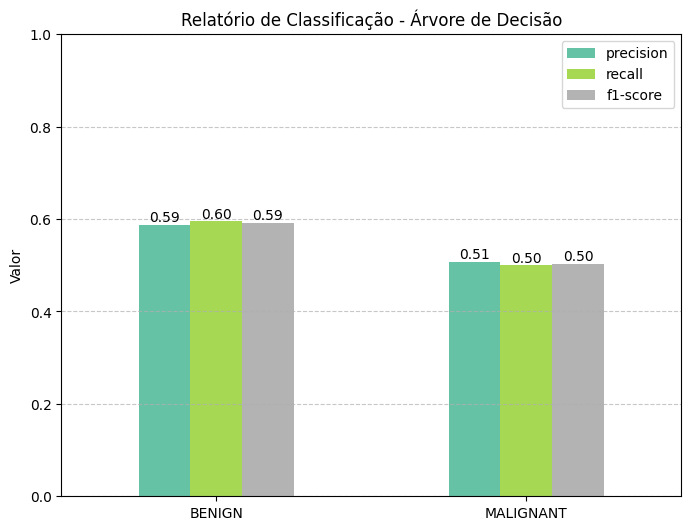

In [26]:
# Visualização do desempenho da árvore de decisão
plot_relatorio_classificacao(rotulo_pca, rotulos_previstos_arvore, "Árvore de Decisão")

O modelo de árvore de decisão tem desempenho equilibrado porém muito baixo em ambas as classes, isso porquê:

* Ele erra muito nas previsões de MALIGNANT (baixa precisão e recall);

* F1-score abaixo de 0.6 para ambas as classes indica baixa efetividade;

* Como recall de 0.50 para MALIGNANT, o modelo só detecta metade dos casos essa taxa é muito insegura para ser aplicada na área de saíude em casos como detecção de tumores.

#### 2.3.4.1. Desempenho do modelo MLP

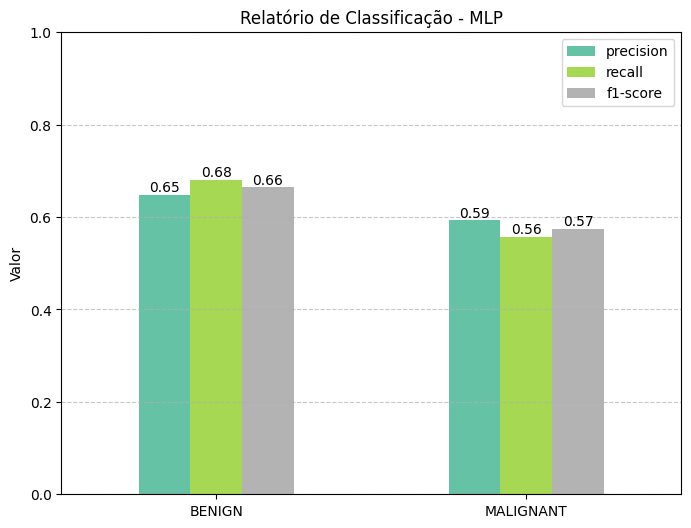

In [27]:
# Visualização do desempenho do MLP
plot_relatorio_classificacao(rotulo_pca, rotulos_previstos_mlp, "MLP")


O modelo MLP apresenta desempenho melhor em ambas as classes.

* A classe MALIGNANT, embora ainda tenha valores moderados, melhorou em relação à árvore;

* Precision aumentou de 0.51 para 0.59;

* Recall aumentou de 0.50 para 0.56;

Isso significa que:

* Mais casos de câncer foram corretamente identificados.

* Menos falsos positivos em ambas as classes.

#### 2.3.4.2. Avaliação comparativa entre os modelos através do relatório de classificação:

* O modelo MLP superou a Árvore de Decisão em todas as métricas para ambas as classes;

* O maior destaque vai para a classe MALIGNANT, onde o MLP apresentou melhora;

* Maior recall: identifica mais casos de câncer;

* Maior precisão: menos falsos positivos;

Em um cenário clínico, como o da base radiômica utilizada, essa melhoria é significativa, pois:

* Reduz o número de pacientes com câncer não detectados (falsos negativos).

* Também reduz o número de pacientes saudáveis classificados como doentes (falsos positivos).

**IMPORTANTE RESSALTAR:**  

A diferença entre os resultados obtidos no F1-Score da Seção 2.3.1 e o dessa seção estão no fato de que foram usadas duas abordagens diferentes para o cálculo:

* Na seção 2.3.1 foi usado cross_val_score() que obteve como resultado:
> F1 médio - Árvore de Decisão: 0.5476  
> F1 médio - MLP: 0.6191

* Já na seção atual classification_report() que nos dá F1-scores individuais por classe, e obtivemos o seguinte resultado no MLP:
> BENIGN  : F1 = 0.66 (MLP)  
> MALIGNANT: F1 = 0.57 (MLP)  
> Média = (0.66 + 0.57)/2 = 0.615 (aproximadamente).

Tais diferenças ocorrem pois o cross_val_score() executa a validação cruzada de verdade. Em cada um dos 10 folds:

* Treina com 90% dos dados;

* Testa com 10%;

* Calcula o F1 macro em cada rodada de teste;

* Depois faz a média dos 10 valores obtidos.

Já o classification_report() não tira a média dos F1s por fold, mas calcula o F1 global com base na soma total dos verdadeiros positivos, falsos positivos e falsos negativos ao longo de toda a base.


### 2.3.5. Curva ROC/AUC
A curva ROC (Receiver Operating Characteristic) mostra a capacidade do modelo em separar corretamente as classes BENIGN e MALIGNANT, ao variar o limiar de decisão:

* O eixo X representa a taxa de falsos positivos (BENIGN previstos como MALIGNANT);

* O eixo Y representa a taxa de verdadeiros positivos (MALIGNANT previstos corretamente);

A AUC (Área Sob a Curva) resume essa performance com um único valor:

* AUC = 1.0: separação perfeita.

* AUC = 0.5: desempenho aleatório.

Função para plotar a curva ROC (serve para árvore e para MLP)
* modelo: O classificador que será avaliado, recebe o modelo treinado (árvore ou MLP);
* nome_modelo: apenas o nome para legendas;
* dados: A matriz com os dados de entrada (features).;
* rotulos: O vetor com os rótulos verdadeiros das classes (BENIGN ou MALIGNANT);
* validador: objeto de validação cruzada estratificada, usado para garantir uma divisão justa e equilibrada dos dados durante o treinamento/teste dos modelos.

In [28]:
def plotar_curva_roc(modelo, nome_modelo, dados, rotulos, validador):
    # Obter as probabilidades previstas com validação cruzada
    probabilidades = cross_val_predict(
        modelo, dados, rotulos, cv=validador, method='predict_proba'
    )

    # Pegar apenas a probabilidade da classe positiva (MALIGNANT)
    probs_classe_positiva = probabilidades[:, 1]

    # Converter rótulos para binário (BENIGN = 0, MALIGNANT = 1)
    rotulos_binarios = LabelEncoder().fit_transform(rotulos)

    # Calcular curva ROC e AUC
    fpr, tpr, _ = roc_curve(rotulos_binarios, probs_classe_positiva)
    auc_valor = roc_auc_score(rotulos_binarios, probs_classe_positiva)

    # Plotar a curva
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f"{nome_modelo} (AUC = {auc_valor:.2f})", lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label="Aleatório")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {nome_modelo}")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


#### 2.3.5.1. Curva ROC/AUC para a Árvore de decisão:

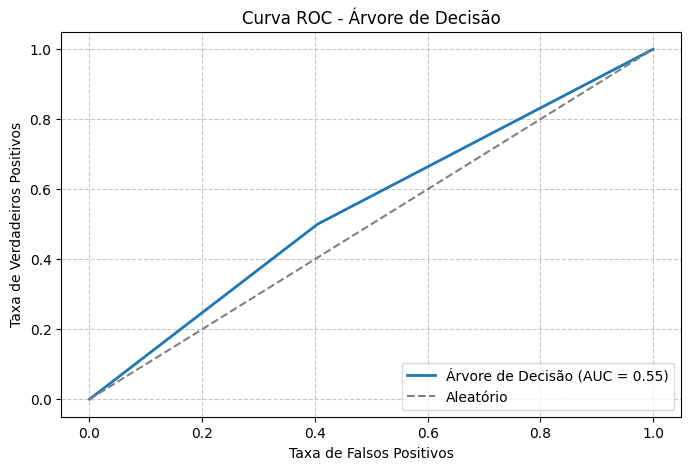

In [29]:
# função para plotar a curva ROC/AUC da árvore
plotar_curva_roc(modelo_arvore, "Árvore de Decisão", dados_pca_transformado, rotulo_pca, validador)

A árvore de decisão apresentou baixa capacidade discriminativa entre as classes BENIGN e MALIGNANT.

* O valor de AUC = 0.55 está muito próximo de 0.5, que representa um modelo aleatório, ou seja, sem habilidade real de separar as classes.

* A curva mostra um padrão quase linear, indicando que o modelo erra tanto quanto acerta ao tentar distinguir as classes.

Conclusão:  
A árvore de decisão não conseguiu aprender bem os padrões dos dados para distinguir entre pacientes com tumores benignos e malignos, sendo um modelo fraco e pouco confiável nesse contexto.

#### 2.3.5.2. Curva ROC/AUC para MLP

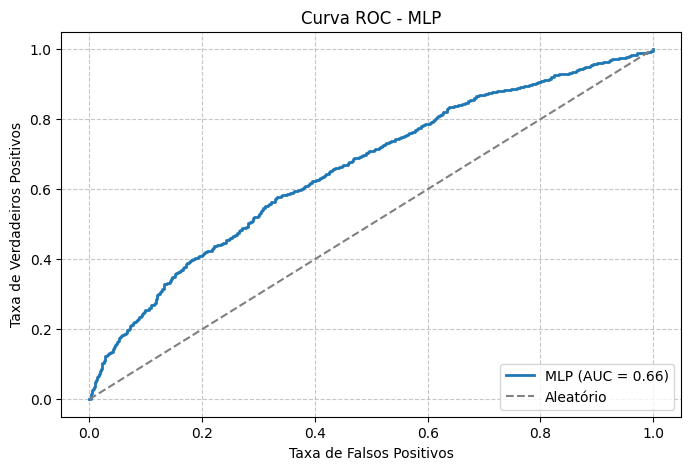

In [30]:
# função para plotar a curva ROC/AUC do MLP
plotar_curva_roc(modelo_mlp, "MLP", dados_pca_transformado, rotulo_pca, validador)

O MLP teve uma capacidade melhor de separação entre as classes, com um AUC razoável.

* O valor de 0.66 indica que o modelo acerta mais do que erra, mas ainda com bastante sobreposição entre as classes.

* Isso é condizente com os resultados do F1-score e matriz de confusão: melhor que a árvore, mas ainda longe do ideal.

Conclusão:  
O MLP mostrou uma melhor habilidade de distinguir as classes em relação à árvore, com uma curva ROC mais elevada e AUC significativamente maior, embora ainda haja muito a se melhorar.

#### 2.3.5.3. Avaliação comparativa entre os modelos através da Curva ROC/AUC

* O MLP supera a árvore de decisão com folga na métrica AUC, o que reforça os resultados anteriores (F1-score, matriz de confusão, relatório de classificação).

* A curva ROC da árvore quase coincide com a linha aleatória, indicando incapacidade prática de classificação confiável.

* A curva do MLP mostra ganho significativo de separação em comparação à curva da árvore, embora ainda com bastante imprecisão.

# 3. Análise de agrupamento
### Seção referente à questão 2:
> Com base nos dados fornecidos anteriormente (removendo os rótulos das classes), realize uma análise de agrupamento (clustering) para identificar padrões sem supervisão:


## 3.1 Buscando o valor ideal de K para executar o K-means
* Utilizaremos o método do cotovelo;

### Seção referente à questão 2 item (b):
> Determine o valor ideal de K para o K-means utilizando o método do cotovelo.

Para determinar o valor ideal de K através do método do cotovelo:

* Executa-se o K-means para vários valores de K (número de clusters);

* Para cada K, calcula-se a soma dos erros quadráticos intra-cluster (inertia).

* Plota-se o valor de K vs Inertia.

Assim, analisa-se o gráfico e o ponto onde a curva "faz um cotovelo" indica um K ideal.

### 3.1.1. Usar dados sem rótulos:

In [31]:
# Garantindo que estamos usando os dados transformados (sem rótulo)
dados_clustering = dados_pca_transformado  # já está normalizado e reduzido via PCA

### 3.1.2. Buscar o K ideal para o K-means:

* Executa-se o K-means várias vezes para calcular a soma das distâncias quadráticas intra-cluster para diferentes números de clusters (K);
* Utilizaremos um range de 2 a 20;
* Plota o gráfico para buscar indentificar a dobra (cotovelo) e com isso escolher o valor de K;
* A "dobra" ou "cotovelo" no gráfico sugere um valor de K onde adicionar mais clusters não traz um ganho proporcional na explicação da variância, indicando um possível bom número de clusters.

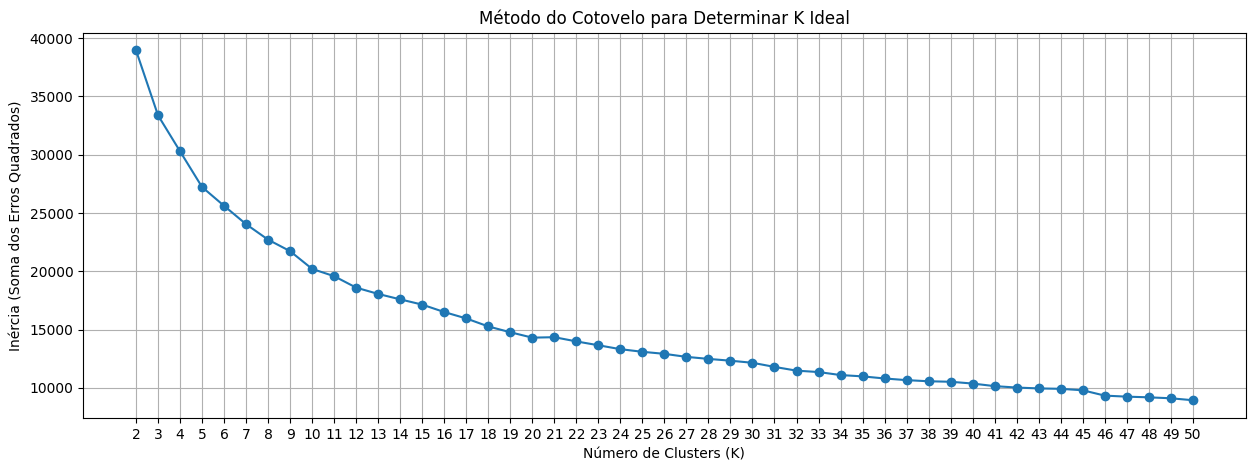

In [32]:
inertias = []
k_values = range(2, 51)

for k in k_values:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(dados_clustering)
    inertias.append(kmeans_k.inertia_)

# Plot do método do cotovelo
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma dos Erros Quadrados)')
plt.title('Método do Cotovelo para Determinar K Ideal')
plt.grid(True)
plt.xticks(k_values)
plt.show()


Analisando visualmente a curva:

* A queda é acentuada entre K = 2 até cerca de 5 e 6.

* A partir de K = 6 ou K = 7, a curva começa a suavizar (a inércia ainda diminui, mas mais lentamente).

* Isso indica que o ganho de qualidade com mais clusters começa a ser indiferente após esse ponto.

Com isso, a pesar de a curva não apontar uma dobra verdadeiramente expressiva, da análise do gráfico escolheremos um **valor de K=5** para nossos testes seguintes;

## 3.2 Executando K-means e Hierárquico com o valor "ideal" de K determinado pelo método do cotovelo.

### Seção referente à questão 2 itens (a):

> a) Execute os algoritmos de K-means e Hierárquico;  

In [33]:
k_ideal = 5

# KMeans com K ideal
kmeans_ideal = KMeans(n_clusters = k_ideal, random_state=42)

# rotulos_kmeans: rótulos atribuídos a cada ponto pelo algoritmo.
rotulos_kmeans = kmeans_ideal.fit_predict(dados_clustering)


# Hierárquico com o mesmo K

# linkage='ward': método que minimiza a variância interna dos clusters.
hierarquico_ideal = AgglomerativeClustering(n_clusters = k_ideal, linkage='ward')

# rotulos_hierarquico: rótulos atribuídos por esse modelo.
rotulos_hierarquico = hierarquico_ideal.fit_predict(dados_clustering)


### 3.2.1. Visualização dos Clusters

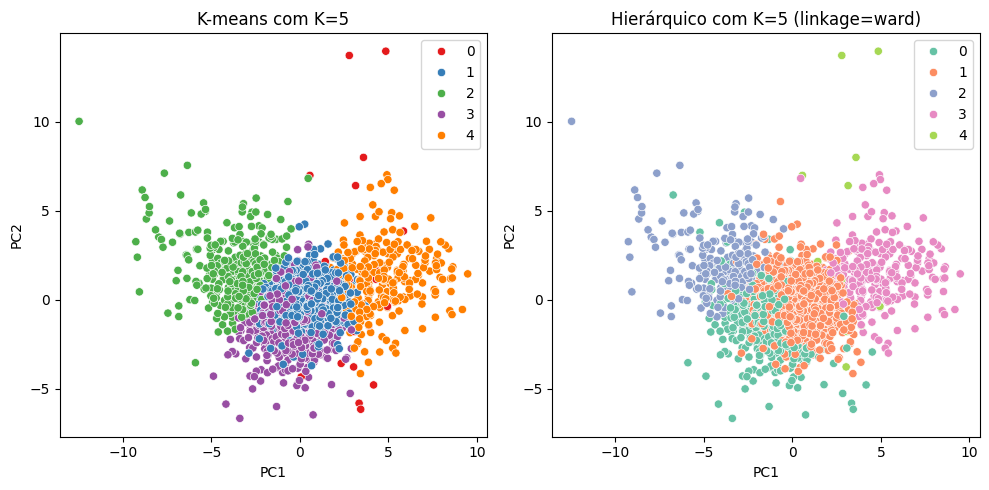

In [34]:
# Usar apenas os dois primeiros componentes principais para visualização em 2D dos clusters

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_kmeans, palette='Set1')
plt.title(f'K-means com K={k_ideal}')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_hierarquico, palette='Set2')
plt.title(f'Hierárquico com K={k_ideal} (linkage=ward)')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


### 3.2.2. Análise visual dos clusters
A pesar de haver uma boa separação, ainda nota-se um certo grau de sobreposição entre os clusters.

Analalisando, visualmente, a distribuição dos clusters pode-se notar:
* Para o K-mens:
  1.  Os clusters de cor laranja estão majoritáriamente à esquerda;
  2.  Os clusters de cores verde, estão à esquerda;
  3.  Os clusters de cores verde e azul se concentram mais ao centro dográfico, e têm um certo grau de sobreposição;
  4.  Os clusters de cor vermelha pouco aparecem, e muitos deles estão sobrepostos;

* Para o hierárquico:  
  Temos uma distribuição muito parecida com a do K-means.

Dessa maneira, podemos notar que as duas classes centrais estão se sobrepondo, levando a intuição de que elas podem ser unidas em uma classe apenas.

**Assim, por uma análise visual, testaremos um valor de K = 3**



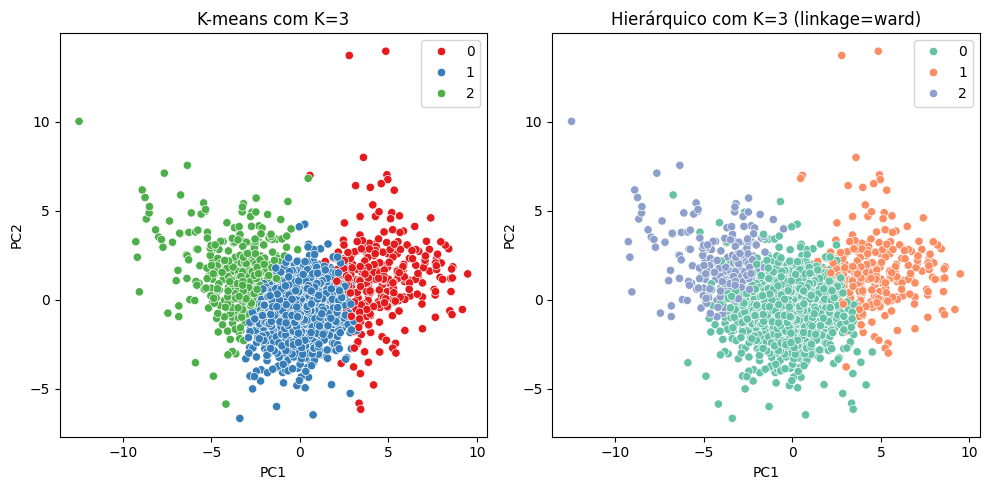

In [35]:
k_ideal = 3

# KMeans com K ideal
kmeans_ideal = KMeans(n_clusters = k_ideal, random_state=42)

# rotulos_kmeans: rótulos atribuídos a cada ponto pelo algoritmo.
rotulos_kmeans = kmeans_ideal.fit_predict(dados_clustering)


# Hierárquico com o mesmo K

# linkage='ward': método que minimiza a variância interna dos clusters.
hierarquico_ideal = AgglomerativeClustering(n_clusters = k_ideal, linkage='ward')

# rotulos_hierarquico: rótulos atribuídos por esse modelo.
rotulos_hierarquico = hierarquico_ideal.fit_predict(dados_clustering)


# ---------- PLOTAR O GRÁFICO COM OS CLUSTERS ----------

# Usar apenas os dois primeiros componentes principais para visualização em 2D dos clusters

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_kmeans, palette='Set1')
plt.title(f'K-means com K={k_ideal}')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_hierarquico, palette='Set2')
plt.title(f'Hierárquico com K={k_ideal} (linkage=ward)')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()



* Diminuir os clusters de 5 para 3 pareceu, visualmente, dar um ganho na separação das classes, havendo apenas uma pequena sobreposição nas áreas de fronteira;

* Agora, buscando diminuir ainda mais essa sobreposição, vamos utilizar um valor de K = 2, e vê se há  algum ganho;

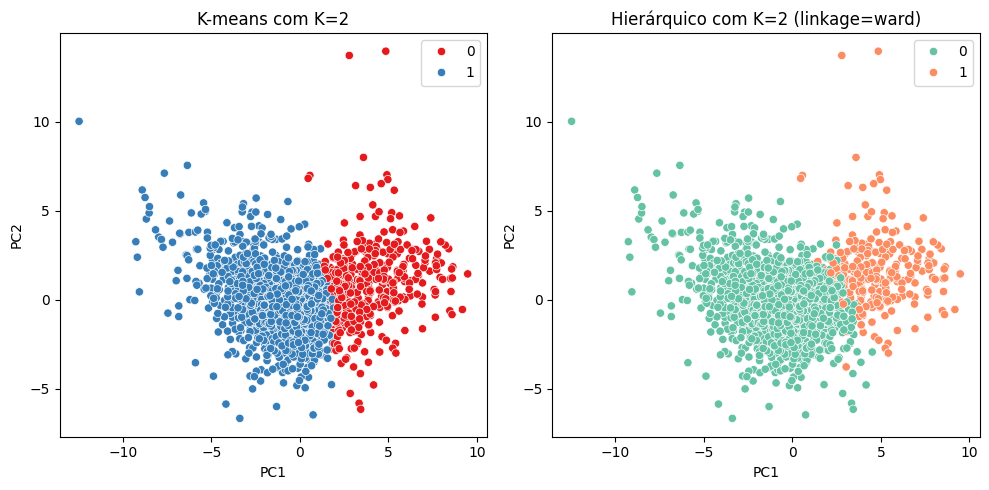

In [36]:
k_ideal = 2

# KMeans com K ideal
kmeans_ideal = KMeans(n_clusters = k_ideal, random_state=42)

# rotulos_kmeans: rótulos atribuídos a cada ponto pelo algoritmo.
rotulos_kmeans = kmeans_ideal.fit_predict(dados_clustering)


# Hierárquico com o mesmo K

# linkage='ward': método que minimiza a variância interna dos clusters.
hierarquico_ideal = AgglomerativeClustering(n_clusters = k_ideal, linkage='ward')

# rotulos_hierarquico: rótulos atribuídos por esse modelo.
rotulos_hierarquico = hierarquico_ideal.fit_predict(dados_clustering)


# ---------- PLOTAR O GRÁFICO COM OS CLUSTERS ----------

# Usar apenas os dois primeiros componentes principais para visualização em 2D dos clusters

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_kmeans, palette='Set1')
plt.title(f'K-means com K={k_ideal}')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
sns.scatterplot(x=dados_clustering[:, 0], y=dados_clustering[:, 1], hue=rotulos_hierarquico, palette='Set2')
plt.title(f'Hierárquico com K={k_ideal} (linkage=ward)')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

* Com K=2 fica evidente a separação das classes, que tem uma mínima sobreposição na zona de fronteira;

* Assim, partindo de tentativa e erro somada à visualização dos clusters em 2D, **escolheremos um K = 2**.

**K ESCOLHIDO = 2**

## 3.3. Linkage

No clustering hierárquico aglomerativo, os dados começam cada um em seu próprio cluster, e vão sendo unidos dois a dois, até sobrar apenas um.

A estratégia usada para unir os clusters se chama linkage, e define como calcular a distância entre dois grupos de pontos.

### Seção referente à questão 2 item (d):
> d) No algoritmo Hierárquico, teste pelo menos dois métodos diferentes de linkage.

Tipos comuns de Linkage:

| Linkage       | O que considera                                     | Característica                      |
|---------------|------------------------------------------------------|-------------------------------------|
| `'ward'`      | Minimiza a variância intra-cluster                  | Mais compacto, exige dados numéricos |
| `'complete'`  | Maior distância entre pontos dos clusters           | Garante clusters bem separados      |
| `'average'`   | Média das distâncias entre pontos dos clusters      | Equilíbrio entre complete e single  |
| `'single'`    | Menor distância entre pontos dos clusters           | Pode gerar clusters longos/finos    |

Assim, testaremos aqui 3 tipos, 'ward', 'complete', e 'average'.

In [37]:
# linkages que vamos testar
tipos_linkage = ['ward', 'complete', 'average']

# Dicionário para armazenar os rótulos de cada linkage
rotulos_hierarquicos = {}


# Aplicar AgglomerativeClustering para cada linkage
# Utilizaremos o K_ideal decidido no final da seção 3.2.2
for metodo in tipos_linkage:
    modelo = AgglomerativeClustering(n_clusters=k_ideal, linkage=metodo)
    rotulos = modelo.fit_predict(dados_clustering)
    rotulos_hierarquicos[metodo] = rotulos


### 3.3.1. Comparação entre as técnicas de clustering utilizando Silhoutte Score:

### Seção referente à questão 2 item (e):
> e) Compare os resultados das técnicas de clustering utilizando métricas adequadas,
justificando suas escolhas.

O Silhouette Score foi escolhido por ser uma métrica robusta e amplamente adotada para avaliar clustering, especialmente em situações em que não se possui rótulos verdadeiros (como neste caso).
Ele permite uma avaliação objetiva da estrutura dos agrupamentos, sem depender da distribuição estatística dos dados ou de medidas sensíveis à escala.

Expressa em um valor padronizado entre -1 e 1, sendo:

>\> 0.7 = excelente;  
0.5 – 0.7 = bom;  
0.3 – 0.5 = razoável;  
< 0.3 = fraco.

In [38]:
# Dicionário para armazenar o resultado
avaliacoes_linkage = {}

# Calculando o Silhouette Score para cada linkage
for metodo, rotulos in rotulos_hierarquicos.items():
    score = silhouette_score(dados_clustering, rotulos)
    avaliacoes_linkage[metodo] = {'Silhouette': score}


### 3.3.2Exibindo os resultados:

In [39]:
# Transformar em DataFrame para visualizar melhor
df_avaliacoes = pd.DataFrame(avaliacoes_linkage).T
df_avaliacoes = df_avaliacoes.round(3)
df_avaliacoes


,Silhouette
ward,0.363
complete,0.710
average,0.737


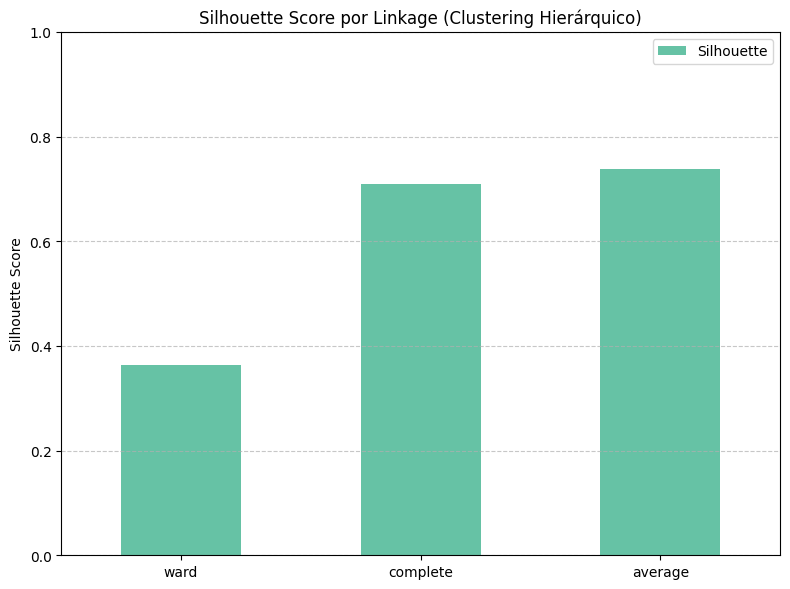

In [40]:
# Gráfico de barras da avaliação
df_avaliacoes.plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title("Silhouette Score por Linkage (Clustering Hierárquico)")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### 3.3.3. Avaliando os resultados:

| Método de Linkage | Silhouette Score |
|-------------------|------------------|
| `ward`            | 0.363            |
| `complete`        | 0.710            |
| `average`         | 0.737            |


1. Linkage ward – Score: 0.363  
  * O agrupamento é existe, mas longe do ideal;

  * Os clusters apresentam alguma separação, mas ainda existe bastante sobreposição entre eles;

  * Assim, ward não foi o melhor método para a estrutura dos dados após PCA.

2. Linkage complete – Score: 0.710
  * O agrupamento é bom, com boa separação entre os clusters.

  * A pontuação indica que a maioria dos pontos está bem agrupada com seus vizinhos, e longe de clusters rivais.

3.  Linkage average – Score: 0.737
  * Este foi o melhor resultado entre os três.

Um Silhouette Score acima de 0.7 indica um agrupamento excelente: os clusters são bem coesos internamente e bem separados entre si.

O método average mostrou-se altamente eficaz para os dados processados via PCA.

**Conclusão final:**  
  * Com base na métrica adotada (Silhouette Score), o método de linkage average apresentou o melhor desempenho, com um score de 0.737, seguido por complete com 0.710. Ambos indicam agrupamentos de alta qualidade, com boa separação e coesão entre os clusters.
  
  * O método ward, apesar de frequentemente ser eficaz em clustering hierárquico, obteve apenas 0.363, o que indica um agrupamento insatisfatório e inferior aos demais.

Assim, average é o método de linkage mais adequado neste problema, revelando padrões mais bem definidos nos dados após redução de dimensionalidade por PCA.